Column Names: Index(['Unnamed: 0', 'Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price',
       'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.'],
      dtype='object')


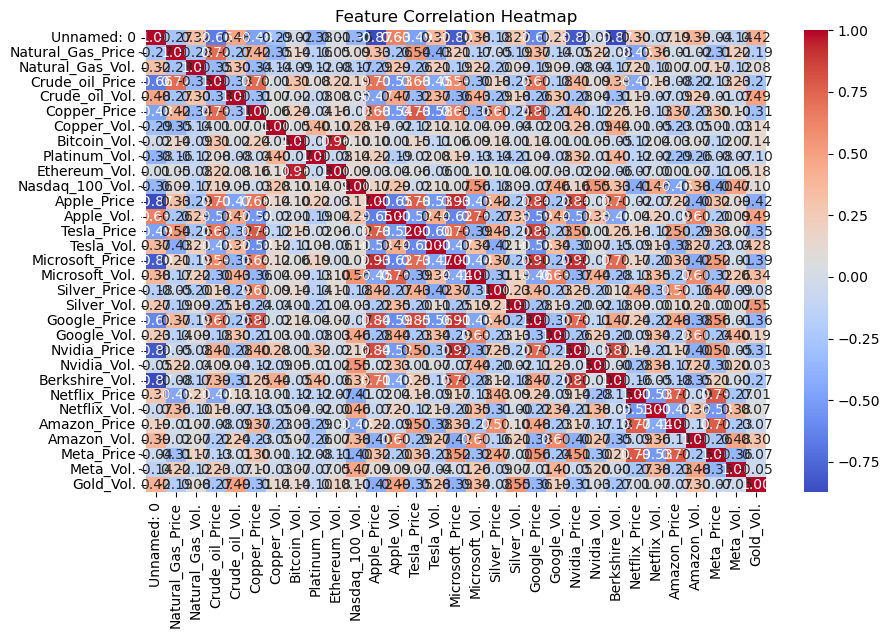

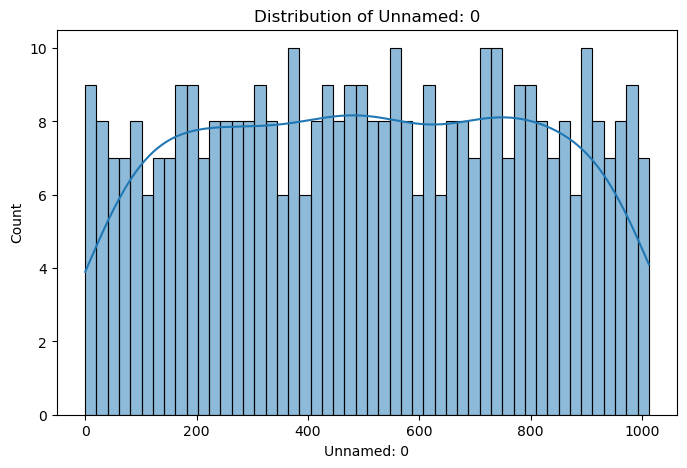

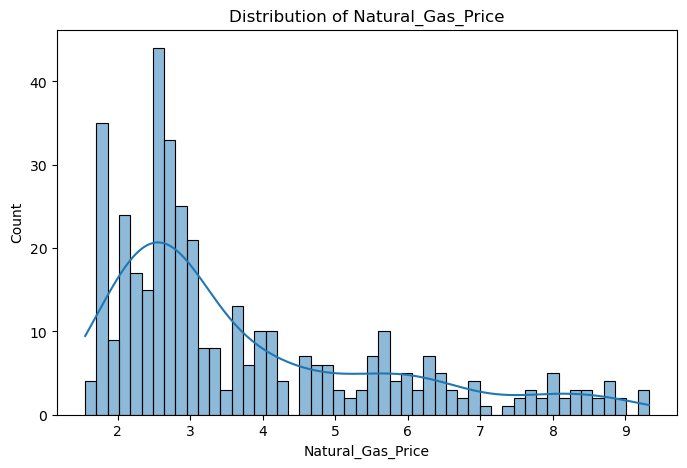

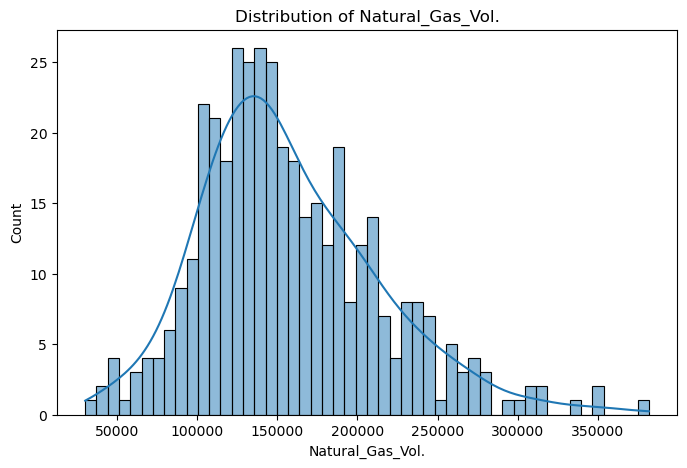

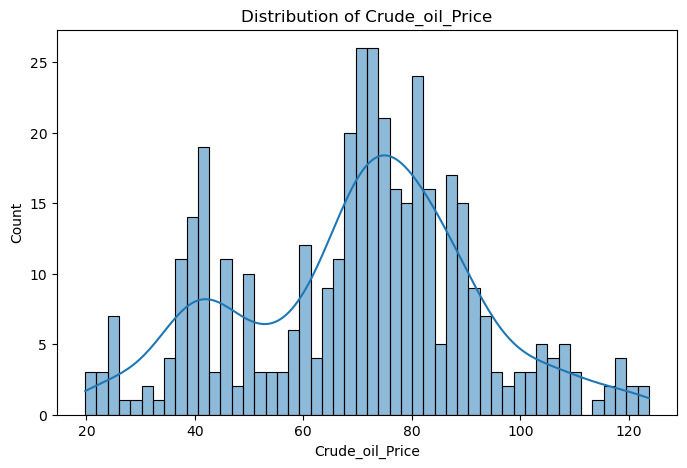

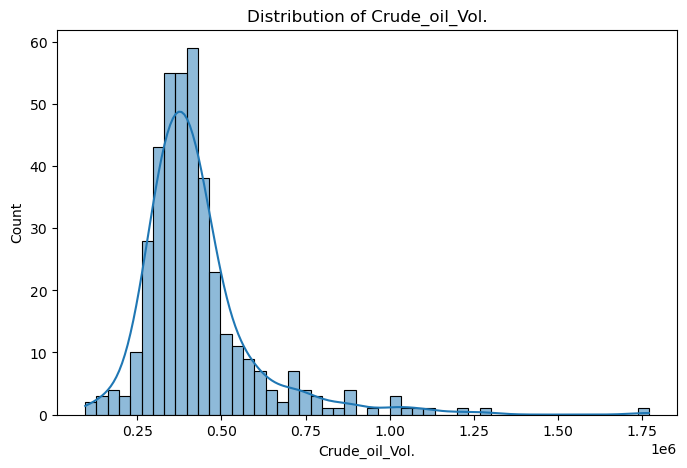

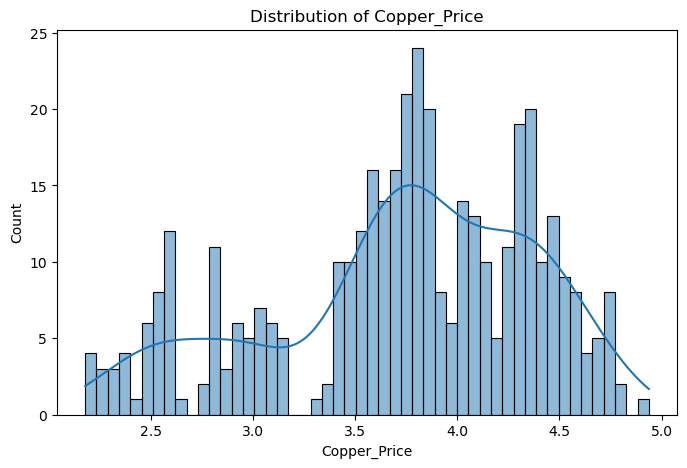

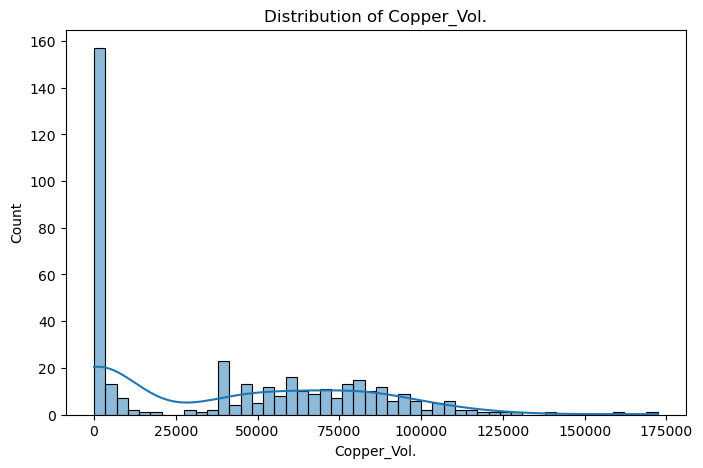

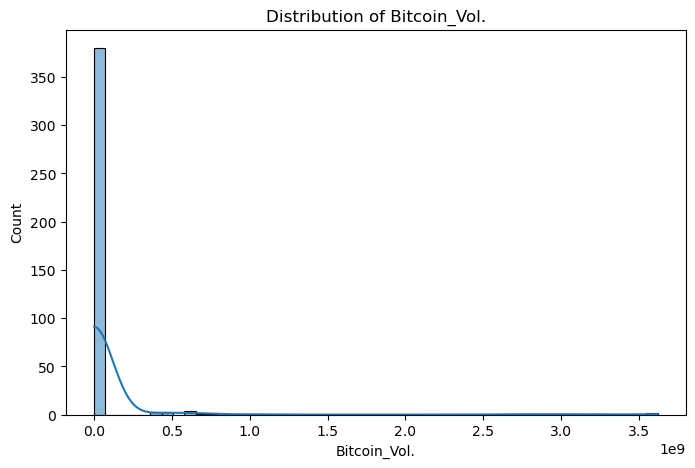

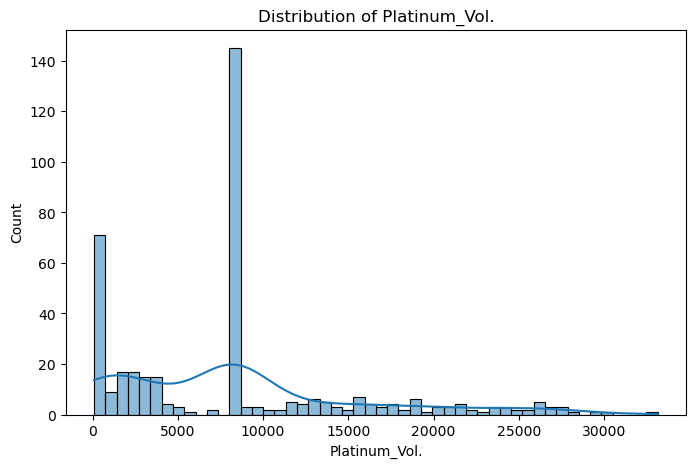

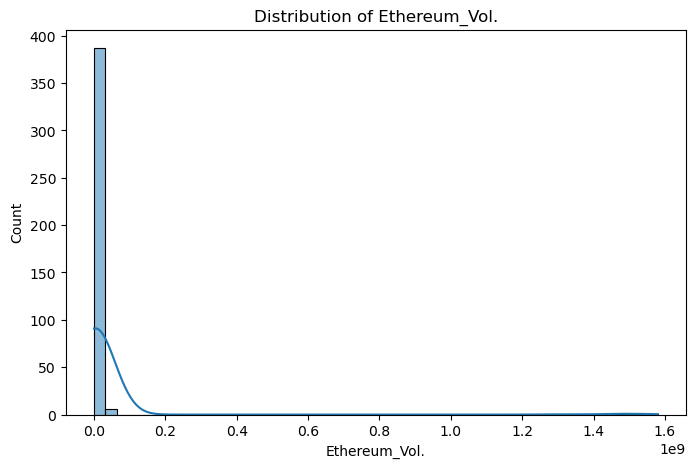

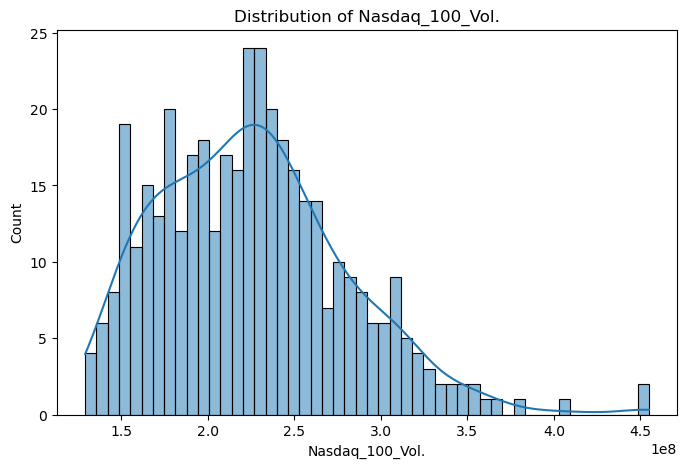

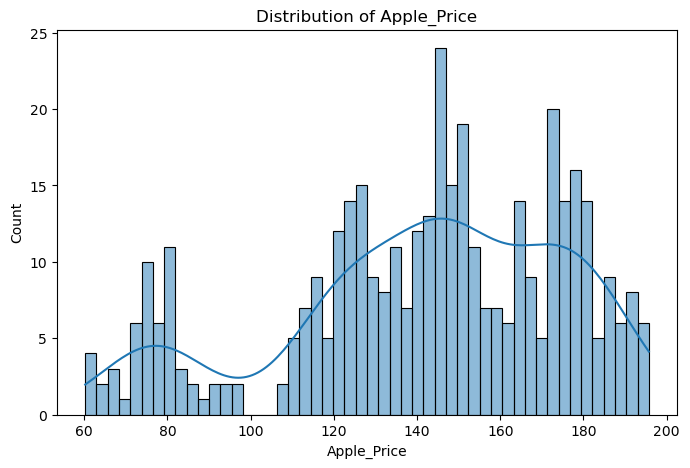

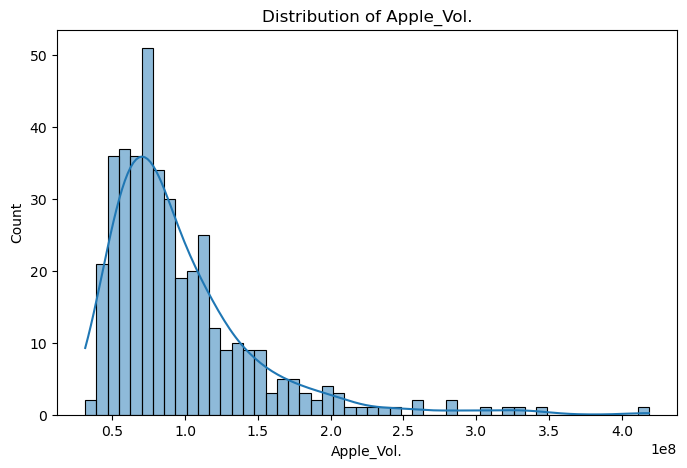

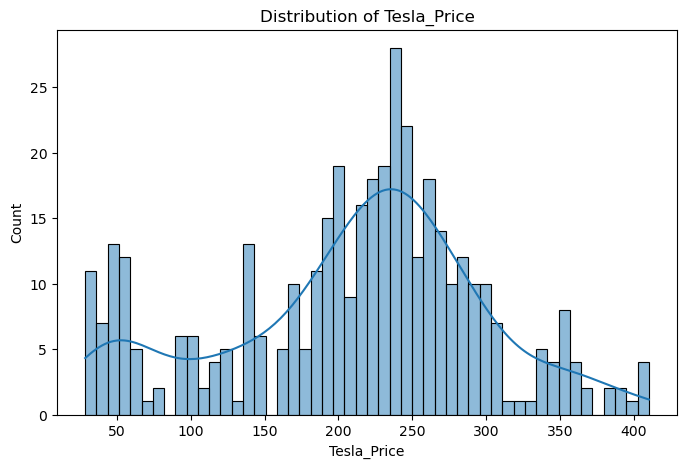

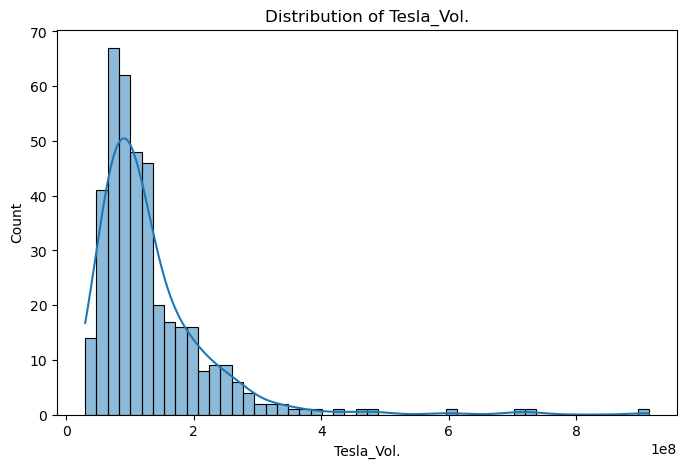

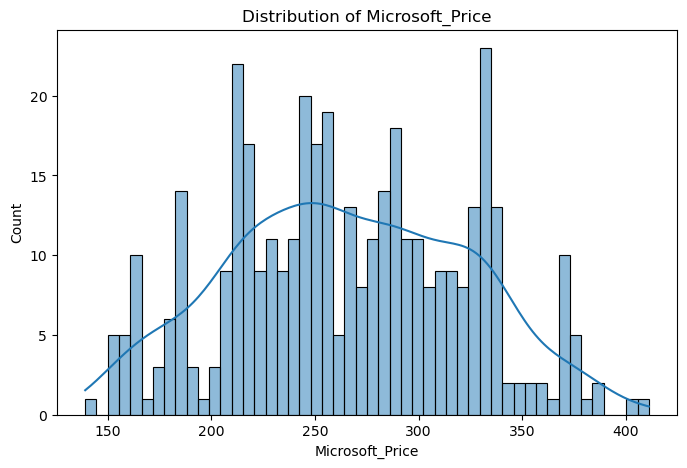

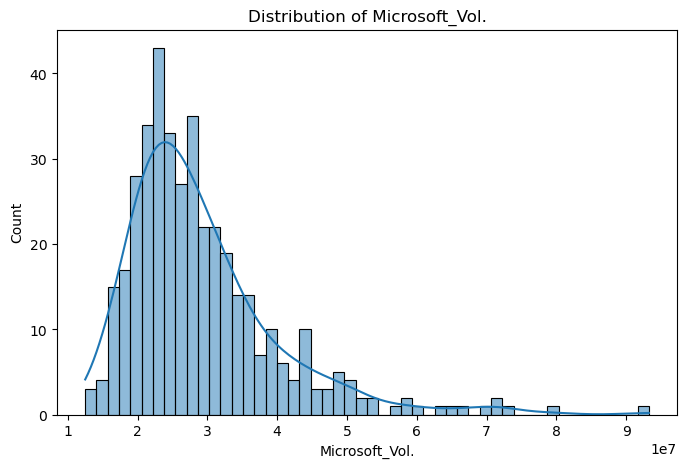

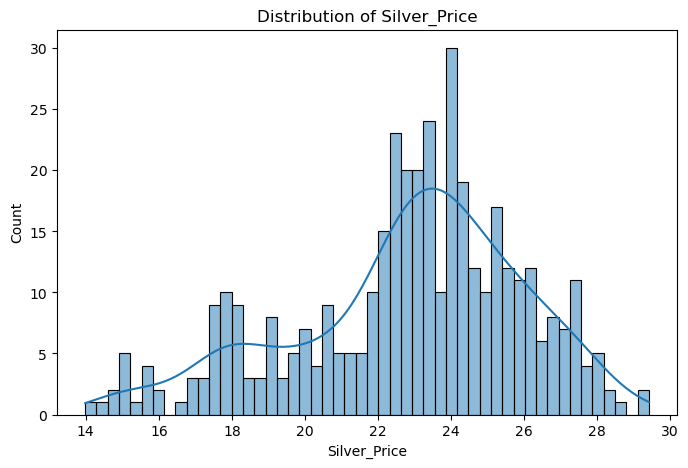

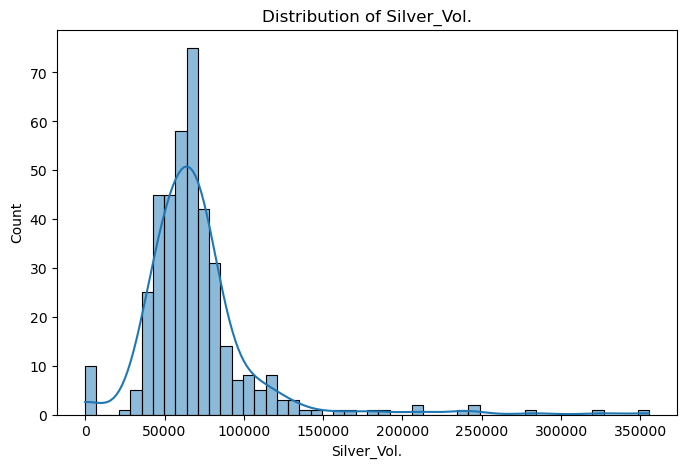

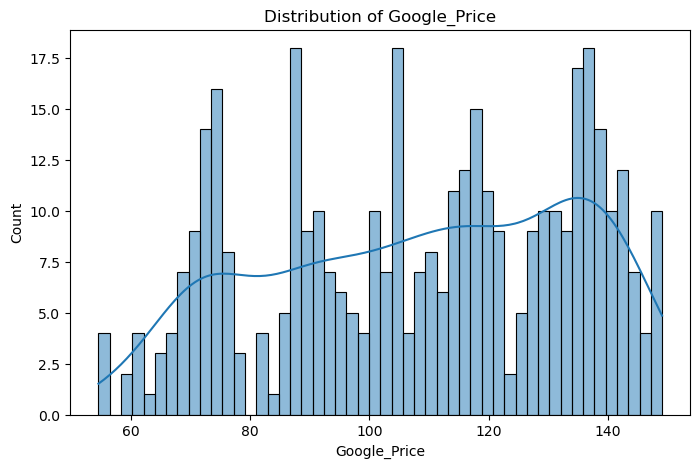

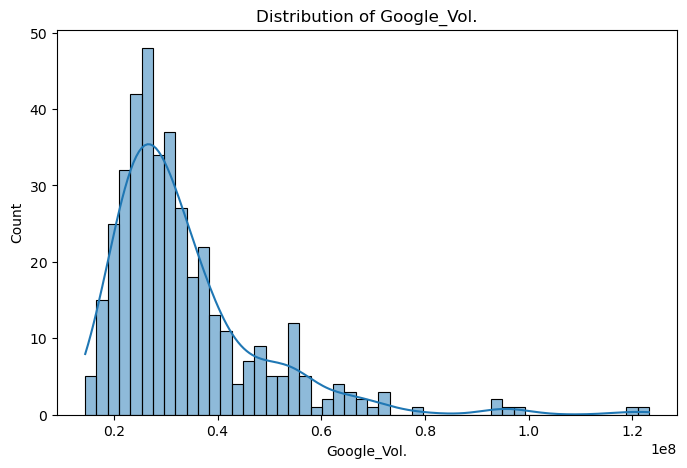

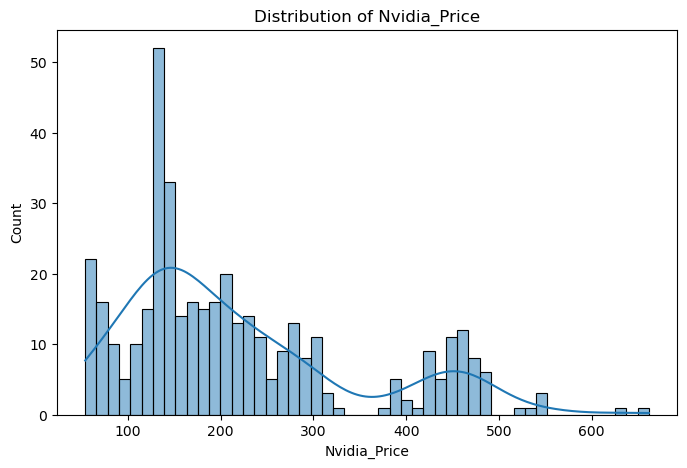

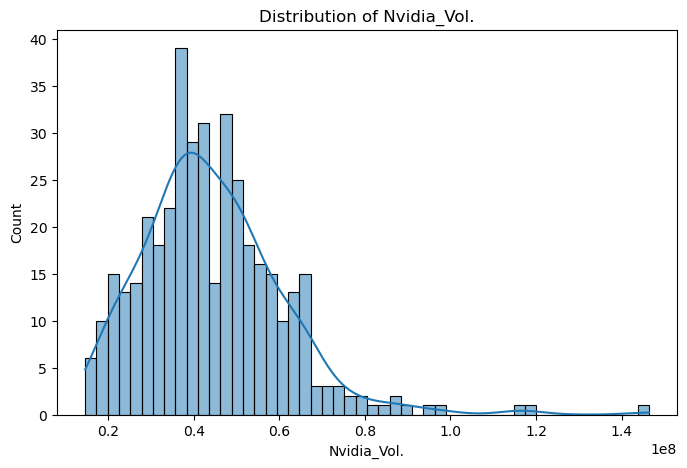

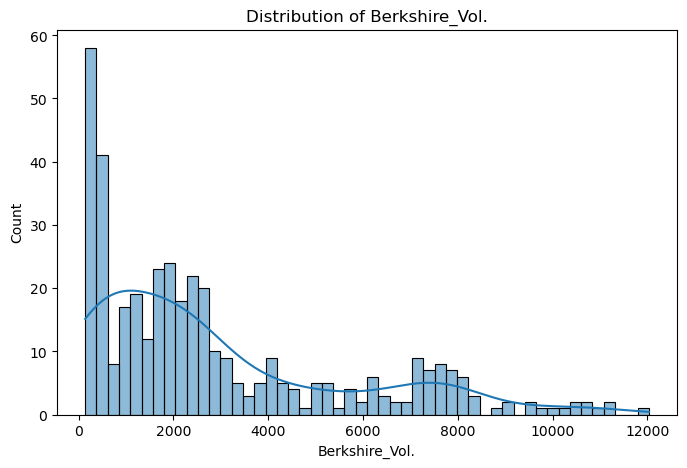

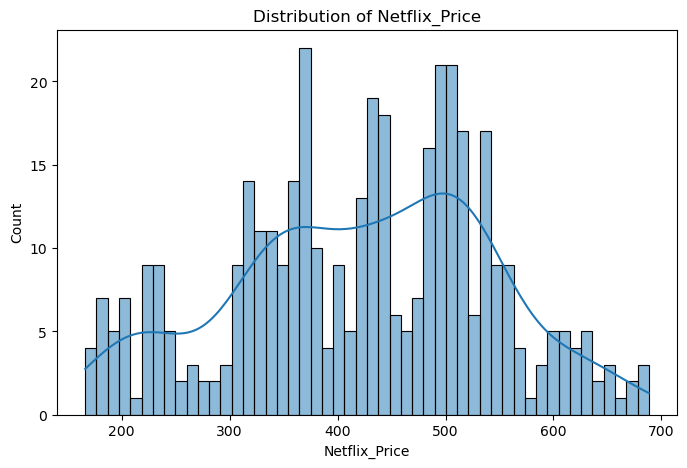

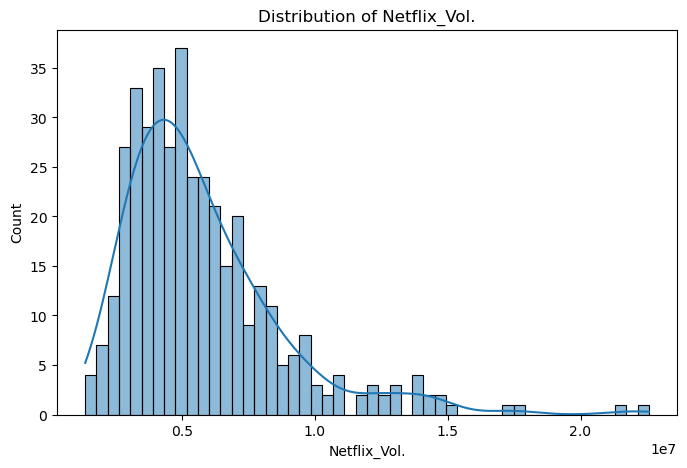

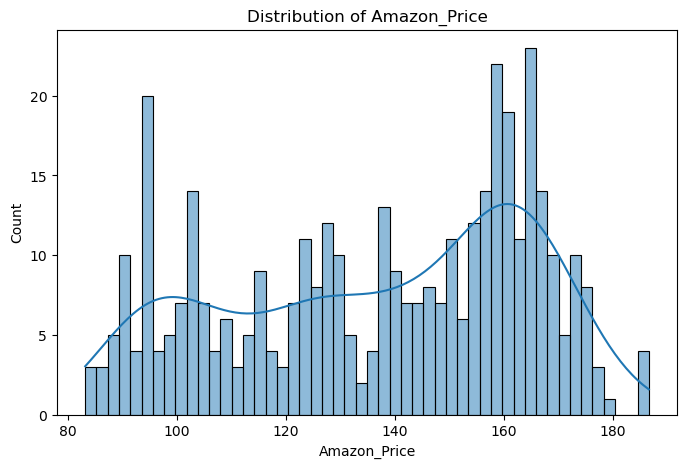

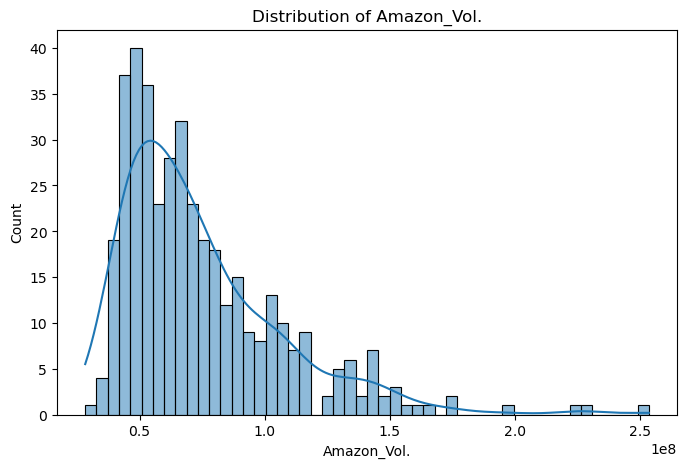

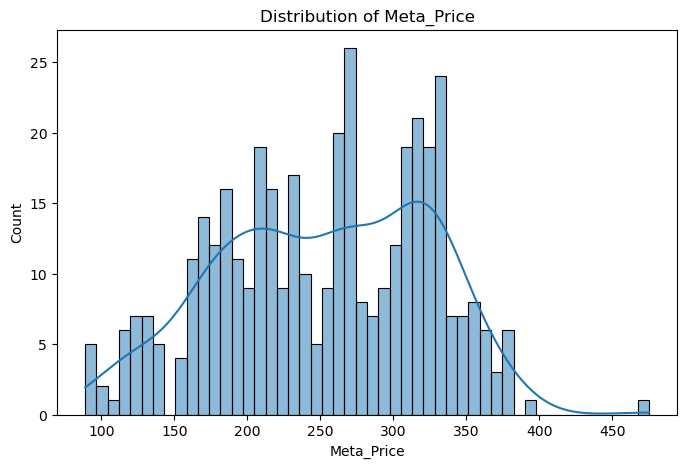

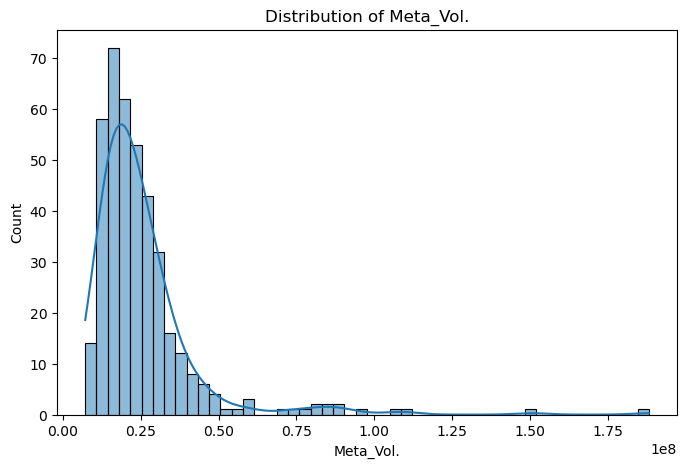

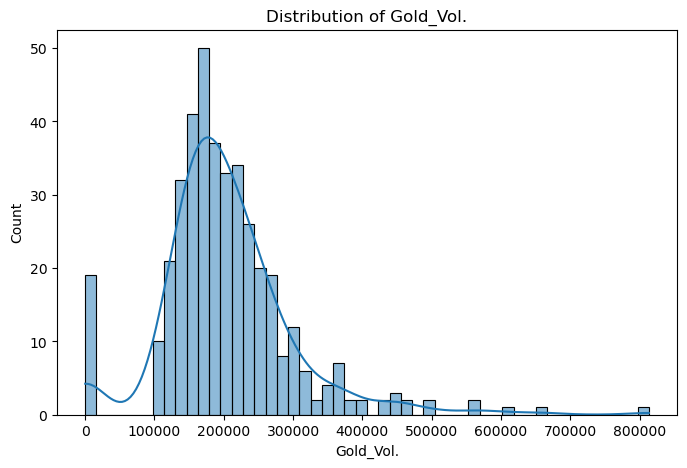

Columns After Feature Engineering: Index(['Unnamed: 0', 'Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price',
       'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.'],
      dtype='object')
Not enough features for model evaluation. Verify feature engineering steps.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset efficiently
df = pd.read_csv("C:\\Users\\harsh\\Downloads\\STOCK_PRICE\\US Stock Market Dataset.csv", low_memory=False)

# Debug: Print column names to verify correct headers
print("Column Names:", df.columns)

# Remove leading/trailing spaces & standardize column names
df.columns = df.columns.str.strip()

# Convert Date column to datetime format & handle errors
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

# Handling missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Exploratory Data Analysis (EDA)
numeric_data = df.select_dtypes(include=['float64', 'int64'])
if not numeric_data.empty:
    plt.figure(figsize=(10,6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.show()
else:
    print("Correlation heatmap skipped due to lack of numeric data.")

# Check distribution of available numeric columns
for col in numeric_data.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Feature Engineering: Creating more attributes for stock price analysis
if 'High' in df.columns and 'Low' in df.columns:
    df['Price_Difference'] = df['High'] - df['Low']  # Daily Price Range

if 'Open' in df.columns and 'High' in df.columns and 'Low' in df.columns:
    df['Volatility'] = (df['High'] - df['Low']) / df['Open']  # Relative volatility

if 'Volume' in df.columns:
    df['Volume_Change'] = df['Volume'].pct_change()  # Percentage change in volume

# **Additional Features**
if 'Open' in df.columns and 'Close' in df.columns:
    df['Daily_Gain'] = df['Close'] - df['Open']  # Difference between open and close prices
    df['Daily_Gain_Percentage'] = ((df['Close'] - df['Open']) / df['Open']) * 100  # Percentage change

if 'Close' in df.columns:
    df['Moving_Avg_20'] = df['Close'].rolling(window=20).mean()  # 20-day moving average
    df['Moving_Avg_50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average
    df['Moving_Avg_100'] = df['Close'].rolling(window=100).mean()  # 100-day moving average
    df['Momentum'] = df['Close'].diff(5)  # Momentum indicator (5-day change)

# Debug: Check available columns after feature engineering
print("Columns After Feature Engineering:", df.columns)

# Model Evaluation (if at least one feature exists)
features = [col for col in ['Price_Difference', 'Volatility', 'Volume_Change', 
                            'Daily_Gain', 'Daily_Gain_Percentage', 
                            'Moving_Avg_20', 'Moving_Avg_50', 'Moving_Avg_100', 'Momentum'] if col in df.columns]

if features:
    df.dropna(inplace=True)  # Remove NaN values before training

    X = df[features]
    y = df['High'] if 'High' in df.columns else df.iloc[:, -1]  # Use High price or last column

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")

    # Plot actual vs predicted values
    plt.figure(figsize=(10,5))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Ideal line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Stock Prices")
    plt.show()
else:
    print("Not enough features for model evaluation. Verify feature engineering steps.")

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller

# Step 1: Load dataset
file_path = "C:\\Users\\harsh\\Downloads\\STOCK_PRICE\\US Stock Market Dataset.csv"  # Update with correct path to your dataset
df = pd.read_csv(file_path)

# Step 2: Verify and clean column names
print("Dataset Columns:", df.columns)  # List available columns
df.rename(columns=lambda x: x.strip(), inplace=True)  # Strip spaces from column names

# Identify the column with stock price data
price_column = None
for col in df.columns:
    if 'close' in col.lower() or 'price' in col.lower():
        price_column = col
        break

if not price_column:
    raise KeyError("Could not find a column for stock prices. Please check your dataset.")

# Step 3: Data Cleaning
df.ffill(inplace=True)  # Forward-fill missing values

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')  # Adjust date format if necessary
df.dropna(subset=['Date'], inplace=True)  # Drop invalid rows with missing dates
df.set_index('Date', inplace=True)

# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
plt.plot(df[price_column], label=f'{price_column}')
plt.title('Stock Price Trend')
plt.xlabel('Date')
plt.ylabel(f'{price_column}')
plt.legend()
plt.show()

# Augmented Dickey-Fuller Test (Stationarity Check)
result = adfuller(df[price_column])
print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")

# Step 5: Feature Engineering
df['Moving_Avg_10'] = df[price_column].rolling(window=10).mean()
df['Exp_Smooth'] = df[price_column].ewm(span=10, adjust=False).mean()

# Step 6: Scaling the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[price_column].values.reshape(-1, 1))

# Step 7: Create sequences for LSTM
def create_sequences(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_sequences(scaled_data, time_step)

# Splitting into train and test sets
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Step 8: Building the LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Step 9: Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Step 10: Visualization of Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Prices')
plt.plot(df.index[-len(y_test):], predictions, label='Predicted Prices')
plt.legend()
plt.title('Stock Price Prediction')
plt.show()